# What is the meaning of $R^2$
$R^2$ is a statistic quantity typically connected with linear regressions. It´s purpose is to measure how good a model fits to the data. Generally we can calculate the residuals of each datapoint and a predicted value, which gives us a measure of **how good we are in predicting** single datapoints. $R^2$ enters the game, if we want to know how well our model fits the data in general.

## Decomposition of the Sum of Squares
first of all some vobabulary:

- SQT (Sum of Squares Total): $SQT = \sum_{i = 1}^n(y_i - \overline y)^2$

- SQE (Sum of Squares Explained): $SQE = \sum_{i = 1}^n(\hat y_1 - y_i)^2$

- SQR (Sum of Squares Residuals): $SQR = \sum_{i = 1}^n(y_i - \hat y_i)^2$

We state that we can break down SQT into two terms SQE and SQR as follows:

$SQT = SQE + SQR$

$R^2$ now is defined as the ratio between SQE and SQT

$R^2 = \dfrac{SQE}{SQR} = \dfrac{\sum_i(\hat y_i - y_i)^2}{\sum_i(y_i - \overline y)} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y)} = 1 - \dfrac{SQR}{SQT}$

Lets have a look at how this works out with some Data

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st

plt.style.use("ggplot")

In [22]:
def SQT(true_vals: np.ndarray) -> float:
    return np.sum(np.square(true_vals - np.mean(true_vals)))

def SQE(true_vals: np.ndarray, predicted_vals: np.ndarray) -> float:
    return np.sum(np.square(predicted_vals - np.mean(true_vals)))

def SQR(true_vals: np.ndarray, predicted_vals: np.ndarray) -> float:
    return np.sum(np.square(true_vals - predicted_vals))

def R_2_a(true_vals: np.ndarray, predicted_vals: np.ndarray) -> float:
    return SQE(true_vals, predicted_vals) / SQT(true_vals)

def R_2_b(true_vals: np.ndarray, predicted_vals: np.ndarray) -> float:
    return 1 - (SQR(true_vals, predicted_vals) / SQT(true_vals))

def note(title: str, msg_list: list[str]) -> None:
    num = 100
    print("="*num)
    print(title)
    print("-"*num)
    for msg in msg_list:
        print(msg)
    print("="*num)

R2-Values
----------------------------------------------------------------------------------------------------
R-2-a: 0.15115624537576597
R-2-b: -0.1696232859514113


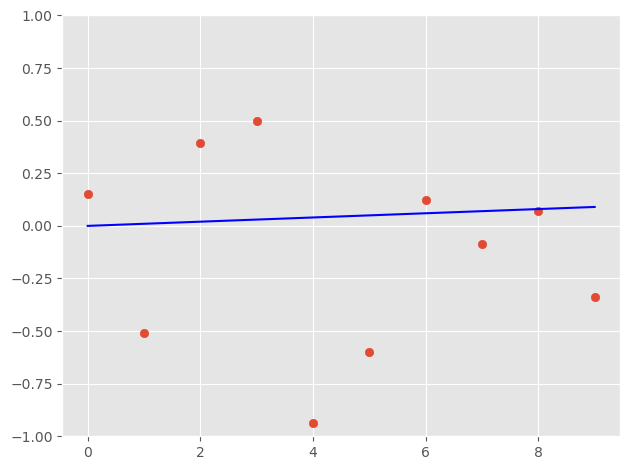

In [39]:
def y_predict_linear(x, slope=0, intercept=0):
    return intercept + x*slope

num = 10
x = np.arange(0, num)

rng = np.random.default_rng(42)
normal_dist = rng.normal(0, 0.5, num)
prediction = y_predict_linear(x, slope=0.01, intercept=0)
true_values = normal_dist + prediction

msg = [
    f"R-2-a: {R_2_a(true_values, prediction)}",
    f"R-2-b: {R_2_b(true_values, prediction)}"
]
note("R2-Values", msg)

fig, ax = plt.subplots()
sc = ax.scatter(x, true_values)
line, = ax.plot(x, prediction, marker="", ls="-", color="blue")
ax.set_ylim(-1, 1)
fig.tight_layout()
plt.show()